Regional model analysis


In [25]:
import numpy as np
import os
import netCDF4
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DayLocator, HourLocator, DateFormatter, drange
from matplotlib.colors import LogNorm

import dateutil.parser
%matplotlib inline

In [2]:
indir = '/data/jialiwang/WRF-NCEP/'
all_files = os.listdir(indir)
print(all_files)

['1995_NCEP_3hr_rain_Portland.nc', '1995_NCEP_3hr_rain_SGP.nc', '1996_NCEP_3hr_rain_Portland.nc', '1996_NCEP_3hr_rain_SGP.nc', '1997_NCEP_3hr_rain_Portland.nc', '1997_NCEP_3hr_rain_SGP.nc', '1998_NCEP_3hr_rain_Portland.nc', '1998_NCEP_3hr_rain_SGP.nc', '1999_NCEP_3hr_rain_Portland.nc', '1999_NCEP_3hr_rain_SGP.nc', '2000_NCEP_3hr_rain_Portland.nc', '2000_NCEP_3hr_rain_SGP.nc', '2001_NCEP_3hr_rain_Portland.nc', '2001_NCEP_3hr_rain_SGP.nc', '2002_NCEP_3hr_rain_Portland.nc', '2002_NCEP_3hr_rain_SGP.nc', '2003_NCEP_3hr_rain_Portland.nc', '2003_NCEP_3hr_rain_SGP.nc', '2004_NCEP_3hr_rain_Portland.nc', '2004_NCEP_3hr_rain_SGP.nc']


In [3]:
sgp_files = []
for fil in all_files:
    if 'SGP.nc' in fil:
        sgp_files.append(fil)
sgp_files.sort()

In [5]:
test_dataset = netCDF4.Dataset(indir+sgp_files[0])

In [9]:
print(test_dataset.variables.keys())
print(test_dataset.variables['rain_exp'])

[u'rain_con', u'rain_exp']
<type 'netCDF4._netCDF4.Variable'>
float32 rain_exp(time, lat, lon)
    long_name: 3hourly non_conv precip
    coordinates: XLONG XLAT
    stagger: 
    units: mm
    description: Explicit Precipitation Tendency
    MemoryOrder: XY 
    FieldType: 104
unlimited dimensions: time
current shape = (2920, 8, 8)
filling off



In [39]:
all_rain = test_dataset.variables['rain_exp'][:] + test_dataset.variables['rain_con'][:]
mean_accum = all_rain.mean(axis = 1).mean(axis =1 )
mean_accum[np.where(mean_accum < 0.0)] = 0.
#seconds since 2006-01-19T07:50:09Z
datestr = 'hours since '+sgp_files[0][0:4]+'-01-01T00:00:00Z'
hours_since_start_of_year = (np.arange(len(mean_accum)) + 1.)*3.0
dt_array = netCDF4.num2date(hours_since_start_of_year, datestr)
test_dataset.close()

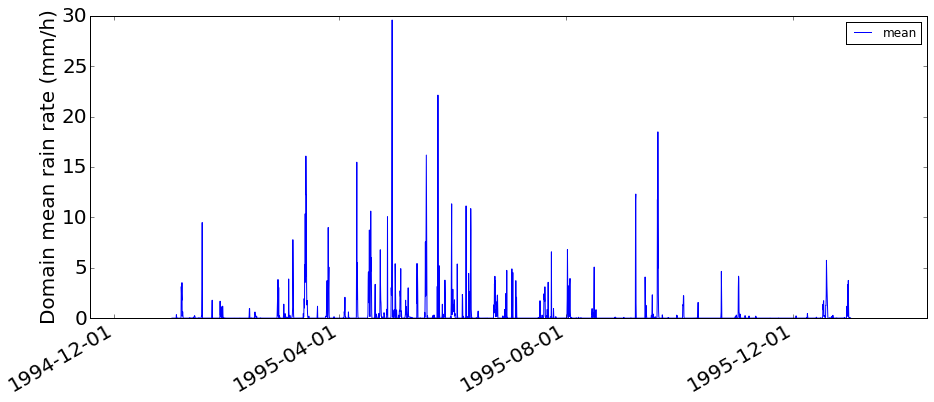

In [38]:
fig = plt.figure(figsize = [15,6])
plt.plot(mdates.date2num(dt_array), mean_accum, 'b-', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval = 4))
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)
plt.legend(loc = 2)
#ax2 = plt.twinx()
#plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
#plt.ylabel('Max rain rate in domain (mm/h)')
#plt.ylim([0,350])

#plt.xlim([mdates.date2num(datetime.datetime(2011,6,1)), mdates.date2num(datetime.datetime(2016,1,1))])
plt.legend()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)



In [54]:
for i in range(len(sgp_files)):
    print(sgp_files[i])
    test_dataset = netCDF4.Dataset(indir+sgp_files[i])
    all_rain = test_dataset.variables['rain_exp'][:] + test_dataset.variables['rain_con'][:]
    mean_accum = all_rain.mean(axis = 1).mean(axis =1 )
    mean_accum[np.where(mean_accum < 0.0)] = 0.
    #seconds since 2006-01-19T07:50:09Z
    datestr = 'hours since '+sgp_files[i][0:4]+'-01-01T00:00:00Z'
    hours_since_start_of_year = (np.arange(len(mean_accum)) + 1.)*3.0
    dt_array = netCDF4.num2date(hours_since_start_of_year, datestr)
    test_dataset.close()
    if i == 0 :
        all_rains = mean_accum/3.0
        all_times = dt_array
    else:
        all_rains = np.append(all_rains, mean_accum/3.0)
        all_times = np.append(all_times, dt_array)

1995_NCEP_3hr_rain_SGP.nc
1996_NCEP_3hr_rain_SGP.nc
1997_NCEP_3hr_rain_SGP.nc
1998_NCEP_3hr_rain_SGP.nc
1999_NCEP_3hr_rain_SGP.nc
2000_NCEP_3hr_rain_SGP.nc
2001_NCEP_3hr_rain_SGP.nc
2002_NCEP_3hr_rain_SGP.nc
2003_NCEP_3hr_rain_SGP.nc
2004_NCEP_3hr_rain_SGP.nc


In [57]:
print(all_rains.shape)
print(all_times.shape)

(29224,)
(29224,)


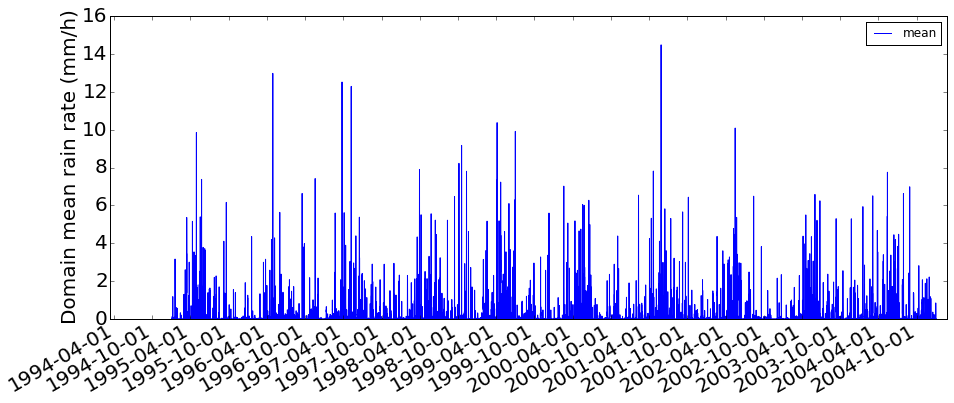

In [59]:
fig = plt.figure(figsize = [15,6])
plt.plot(mdates.date2num(all_times), all_rains, 'b-', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval = 6))
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)
plt.legend(loc = 2)
#ax2 = plt.twinx()
#plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
#plt.ylabel('Max rain rate in domain (mm/h)')
#plt.ylim([0,350])

#plt.xlim([mdates.date2num(datetime.datetime(2011,6,1)), mdates.date2num(datetime.datetime(2016,1,1))])
plt.legend()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)



In [65]:
hours = np.arange(8) *3.
boxed_means_hours = []
months = np.linspace(1,12,12)
boxed_means_months = []
weeks = np.linspace(1,52, 52)
boxed_means_weeks = []

for hour in hours:
    foo = [ a.hour == hour for a in all_times]
    boxed_means_hours.append(all_rains[np.where(foo)])

months = np.linspace(1,12,12)
boxed_means_months = []
for month in months:
    foo = [ a.month == month for a in all_times]
    boxed_means_months.append(all_rains[np.where(foo)])


hrly = np.array([a.mean() for a in boxed_means_hours])
monthly = np.array([a.mean() for a in boxed_means_months])
nbins = 50
rr = (0.05, 3)
hist_rf = np.zeros([len(hours), nbins])
for i in range(len(hours)):
    bine = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[1]
    hist_rf[i,:] = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])
lt = (hours - 5) % 24
lts = ["%d" % a for a in lt] 
hist_rf_monthly = np.zeros([len(months), nbins])
for i in range(len(months)):
    bine2 = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[1]
    hist_rf_monthly[i,:] = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])



In [66]:
monthly = np.array([a.mean() for a in boxed_means_months])
monthly50 = np.array([np.percentile(a, 50) for a in boxed_means_months])
monthly25 = np.array([np.percentile(a, 25) for a in boxed_means_months])
monthly75 = np.array([np.percentile(a, 75) for a in boxed_means_months])
hrly = np.array([a.mean() for a in boxed_means_hours])
hrly50 = np.array([np.percentile(a, 50) for a in boxed_means_hours])
hrly25 = np.array([np.percentile(a, 25) for a in boxed_means_hours])
hrly75 = np.array([np.percentile(a, 75) for a in boxed_means_hours])

<matplotlib.colorbar.Colorbar instance at 0x10a246998>

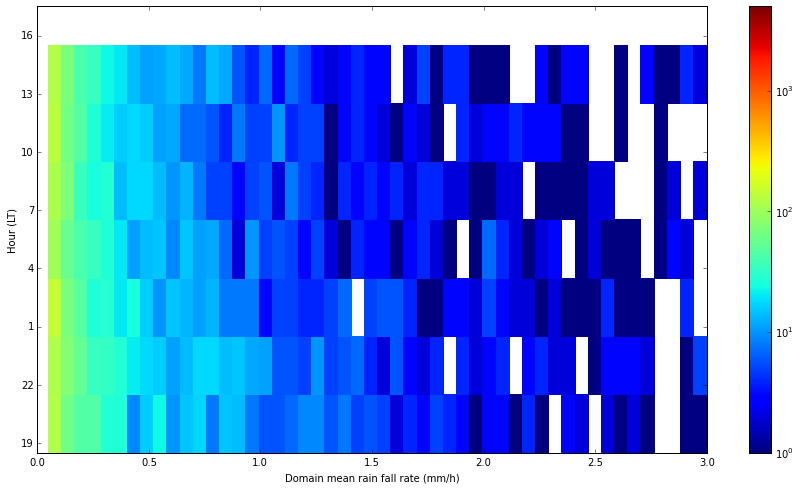

In [69]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine, hours, hist_rf, norm=LogNorm(vmin=1, vmax=5000))
ax = plt.gca()
mty = plt.yticks(hours+.5, lts)
plt.ylim([0,23])
plt.ylabel('Hour (LT)')
plt.xlabel('Domain mean rain fall rate (mm/h)')
plt.colorbar()

(1, 12)

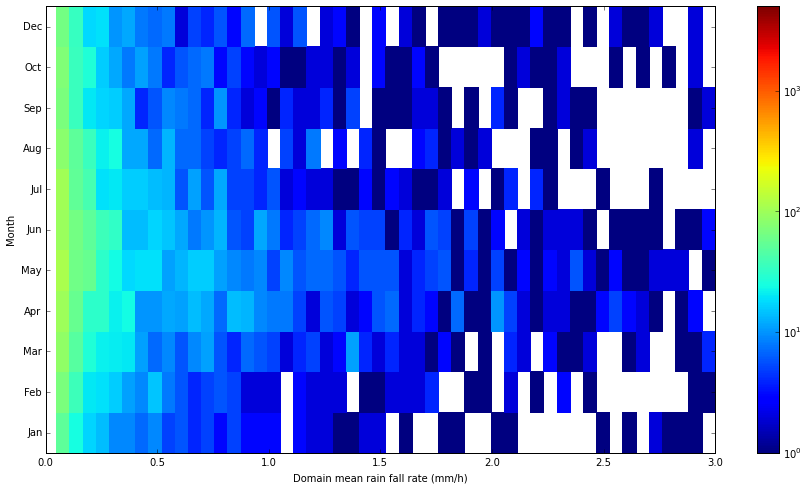

In [70]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine2, months, hist_rf_monthly, norm=LogNorm(vmin=1, vmax=5000))
plt.ylabel('Month')
plt.xlabel('Domain mean rain fall rate (mm/h)')

plt.colorbar()
montext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Dec']
mty = plt.yticks(months + 0.5, montext)
plt.ylim([1,12])

In [64]:
print np.arange(8)*3.

[  0.   3.   6.   9.  12.  15.  18.  21.]
